<a href="https://colab.research.google.com/github/mtxslv/StudyingMachineLearning/blob/master/ConceitosMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Reconhecimentos:

In [0]:
# Profundos agradecimentos a Gilvandro César de Medeiros pela confiança e espírito inovador.
# Agradecimentos aos professores Orivaldo Santana e Fábio Souza, pela confiança, ensinos e guia.
# Agradecimentos a Ricardo Halla por dividir dúvidas e tanto conhecimento comigo.
# Agradecimentos a meus amigos e colegas por estarem nesse barco comigo.
# Huge thanks to Chris Albon, whose example helped me writing the Perceptron code. 
#   Please, check out his work: <https://chrisalbon.com/machine_learning/basics/perceptron_in_scikit-learn/>

In [0]:
# This code was written with the amazing help of Gilvandro César de Medeiros.
# Please, check out his work! 
# github.com/gilvandrocesardemedeiros

#Importações importantes:

In [0]:
import numpy as np # necessário para gerar base de dados
import matplotlib.pyplot as plt # necessário para plotagem
import pandas as pd # objetos pandas são comumente utilizados para base de dados
from sklearn.linear_model import Perceptron #modelo de aprendizado de máquina a ser utilizado
from sklearn.model_selection import train_test_split #separar conjuntos de teste e de treino
from sklearn.preprocessing import StandardScaler # necessário pra escalonar os dados
from sklearn.metrics import accuracy_score # averiguar a acurácia dos modelos

Falar, na minha aulinha, porque é importante normalizar os dados durante o aprendizado de máquina. Referências [aqui](https://developers.google.com/machine-learning/crash-course/representation/cleaning-data)

# Redes Neurais Artificiais TO_DO


A hipótese conexionista é uma alternativa à computação algorítmica, e relembra (em algum ponto) a estrutura do cérebro humano.


In [0]:
# TODO

## Neurônio artificial: Perceptron

O perceptron é ...

Para o primeiro exemplo, iremos tratar um problema [linearmente separável](https://en.wikipedia.org/wiki/Linear_separability). Isto é, nosso conjunto de dados pode ser separado por um hiperplano (em duas dimensões, uma linha) de forma que nenhum exemplo da **classe A** aparece na "área" da **classe B** e vice-versa.

In [0]:
# Construindo o data-set

# gerando uma matrix 600x2 com dados pseudo-randômicos
data = np.random.randint(low = 0,high = 100,size = (600,2)) 
#Atribuindo os valores de data a um objeto pandas
X = pd.DataFrame(data,columns = ['x1','x2'])

# Vamos supor que pontos acima da linha x2 = 0.6*x1 + 20 pertencem
# à classe 1, e os restantes à classe 0:
y = (0.6*X['x1']+20>X['x2']).astype(int)
  

In [0]:
#Observando nosso data-set

X # Mostrar o dataset



,x1,x2
0,86,3
1,8,58
2,78,68
3,28,31
4,83,13
5,78,65
6,34,73
7,91,33
8,35,55
9,85,52


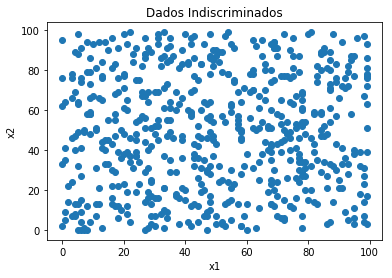

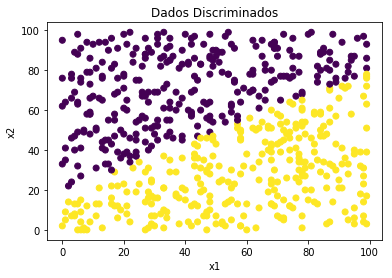

In [0]:
#Que tal mais uma olhada?


plt.figure(1)
plt.title('Dados Indiscriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X['x1'],X['x2'])

plt.figure(2)
plt.title('Dados Discriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X['x1'],X['x2'],c=y)

plt.show()

In [0]:
# Some pre-processing

# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X)

# Apply the scaler to the X training data
X_std = sc.transform(X)


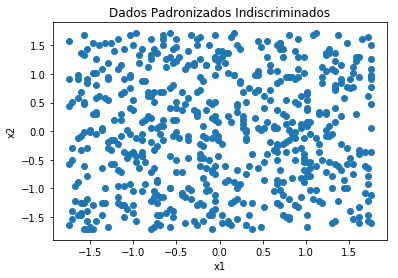

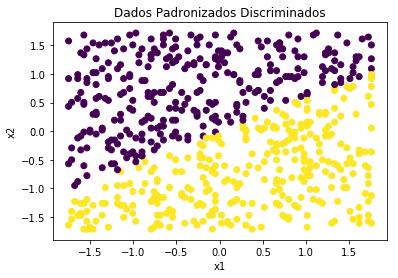

In [0]:
#Let's see what just happened...


plt.figure(1)
plt.title('Dados Padronizados Indiscriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_std[:,0],X_std[:,1])

plt.figure(2)
plt.title('Dados Padronizados Discriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_std[:,0],X_std[:,1],c=y)

plt.show()


In [0]:
# Split the data into 70% training data and 30% test data
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3)

In [0]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ptron = Perceptron(max_iter=1000, eta0=0.1, random_state=0)

# Train the perceptron
ptron.fit(X_train, y_train)

#Valores relativos ao aprendizado...
print(f'ptron.coefs_ = {ptron.coef_} , ptron.intercept_ = {ptron.intercept_}')

ptron.coefs_ = [[ 0.64330181 -1.09621677]] , ptron.intercept_ = [0.]


In [0]:
# Vamos tentar prever os valores relativos a X_test
y_pred = ptron.predict(X_test)

Accuracy: 1.00


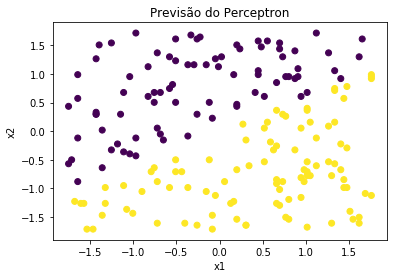

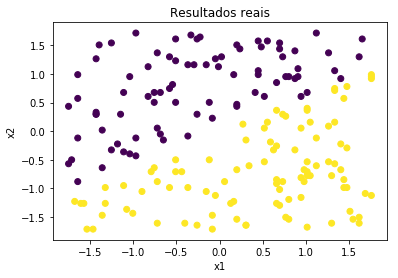

In [0]:
#Let's see what just happened...


#Numericamente...
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
# Confusion matrix... TODO

# Graficamente...
plt.figure(1)
plt.title('Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test[:,0],X_test[:,1],c = y_pred)

plt.figure(2)
plt.title('Resultados reais')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test[:,0],X_test[:,1],c = y_test)

plt.show()


Ok, agora vamos lidar com um [problema que não é linearmente separável](https://en.wikipedia.org/wiki/Linear_separability#Examples). Ou seja, não é possível separarmos as classes **com apenas uma linha**.

In [0]:
#Vamos usar a mesma base de dados X. Entretanto, a classificação agora será diferente.

y_2 =( (np.power(X['x1']-80,2)+ np.power(X['x2']-25,2) )>25*25 ).astype(int)
# (x-80)² + (y-25)² = 25²


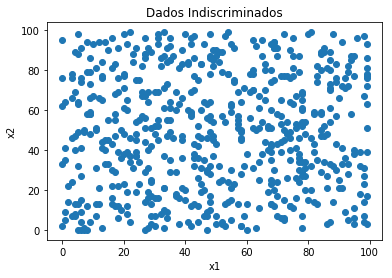

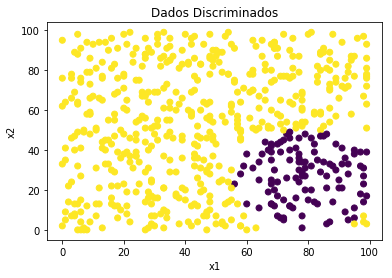

In [0]:
#Observando nosso data-set

plt.figure(1)
plt.title('Dados Indiscriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X['x1'],X['x2'])

plt.figure(2)
plt.title('Dados Discriminados')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X['x1'],X['x2'],c=y_2)

plt.show()


In [0]:
# Split the data into 70% training data and 30% test data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_std, y_2, test_size=0.3)

In [0]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
ptron_2 = Perceptron(max_iter=1000, eta0=0.1, random_state=0)

# Train the perceptron
ptron_2.fit(X_train_2, y_train_2)

#Valores relativos ao aprendizado...
print(f'ptron_2.coefs_ = {ptron_2.coef_} , ptron_2.intercept_ = {ptron_2.intercept_}')

ptron_2.coefs_ = [[-0.31039902  0.19657896]] , ptron_2.intercept_ = [0.5]


In [0]:
# Vamos tentar prever os valores relativos a X_test
y_pred_2 = ptron_2.predict(X_test_2)

Accuracy: 0.91


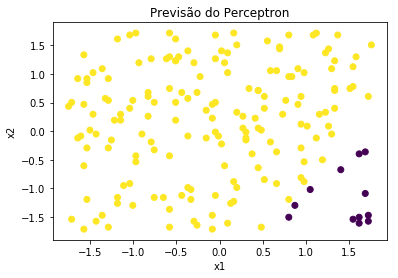

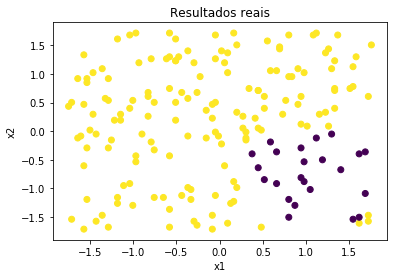

In [0]:
#Let's see what just happened...


#Numericamente...
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % accuracy_score(y_test_2, y_pred_2))
# Confusion matrix... TODO

# Graficamente...
plt.figure(1)
plt.title('Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test_2[:,0],X_test_2[:,1],c = y_pred_2)

plt.figure(2)
plt.title('Resultados reais')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test_2[:,0],X_test_2[:,1],c = y_test_2)

plt.show()


Notem que a previsão do perceptron se aproxima do comportamento de uma reta! Isso ocorre porque o perceptron **só consegue lidar com casos linearmente separáveis**. Uma solução para esse problema chama-se [*feature crossing*](https://developers.google.com/machine-learning/crash-course/feature-crosses/video-lecture).

In [0]:
# Adding crossed features
X['xx1'] = np.power(X['x1'],2) # x1²
X['xx2'] = np.power(X['x2'],2) # x2²

X

,x1,x2,xx1,xx2
0,86,3,7396,9
1,8,58,64,3364
2,78,68,6084,4624
3,28,31,784,961
4,83,13,6889,169
5,78,65,6084,4225
6,34,73,1156,5329
7,91,33,8281,1089
8,35,55,1225,3025
9,85,52,7225,2704


In [0]:
# Let's pre-process again!

# Train the scaler, which standarizes all the features to have mean=0 and unit variance
sc = StandardScaler()
sc.fit(X)

# Apply the scaler to the X training data
X_std = sc.transform(X)

In [0]:
# Split the data into 70% training data and 30% test data
new_X_train_2, new_X_test_2, new_y_train_2, new_y_test_2 = train_test_split(X_std, y_2, test_size=0.3)

In [0]:
# Create a perceptron object with the parameters: 40 iterations (epochs) over the data, and a learning rate of 0.1
new_ptron_2 = Perceptron(max_iter=1000, eta0=0.1, random_state=0)

# Train the perceptron
new_ptron_2.fit(new_X_train_2, new_y_train_2)

#Valores relativos ao aprendizado...
print(f'new_ptron_2.coefs_ = {new_ptron_2.coef_} , new_ptron_2.intercept_ = {new_ptron_2.intercept_}')

new_ptron_2.coefs_ = [[-0.92252544 -0.91975825  0.50656167  1.68507361]] , new_ptron_2.intercept_ = [1.1]


In [0]:
# Vamos tentar prever os valores relativos a X_test
new_y_pred_2 = new_ptron_2.predict(new_X_test_2)

Accuracy: 0.91


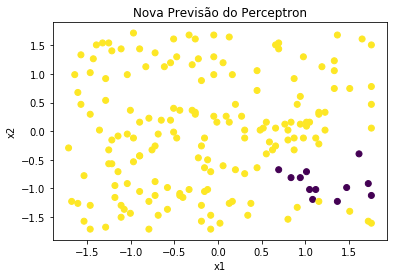

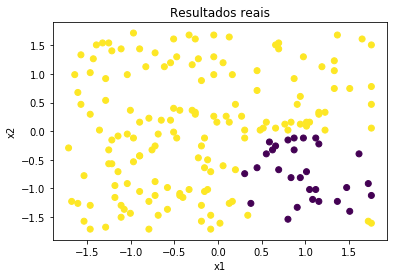

In [0]:
#Let's see what just happened...


#Numericamente...
# View the accuracy of the model, which is: 1 - (observations predicted wrong / total observations)
print('Accuracy: %.2f' % accuracy_score(new_y_test_2, new_y_pred_2))
# Confusion matrix... TODO

# Graficamente...
plt.figure(1)
plt.title('Nova Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(new_X_test_2[:,0],new_X_test_2[:,1],c = new_y_pred_2)

plt.figure(2)
plt.title('Resultados reais')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(new_X_test_2[:,0],new_X_test_2[:,1],c = new_y_test_2)

plt.show()


*Ok, ok... mas alguma coisa mudou?*

Vamos checar os gráficos da antiga, e da nova, previsões do perceptron.

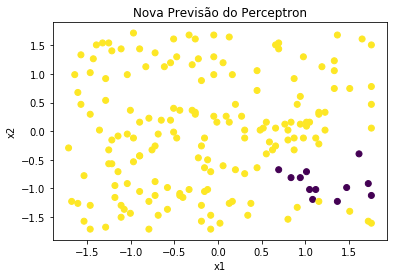

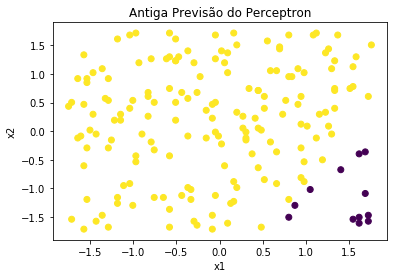

In [0]:
# Graficamente...

plt.figure(1)
plt.title('Nova Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(new_X_test_2[:,0],new_X_test_2[:,1],c = new_y_pred_2)

plt.figure(2)
plt.title('Antiga Previsão do Perceptron')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(X_test_2[:,0],X_test_2[:,1],c = y_pred_2)

plt.show()

## Neurônio Artificial: Adaline

## *Multi-Layer Perceptron* (Perceptron de Muitas Camadas)